# Lecture 3 - Intro to ML: Support Vector Machine

## 0. Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

## 0. Example

In [3]:
X = [[0.,0.], [1.,1.]]
y = [0,1]
classif = svm.SVC(kernel='linear')
classif.fit(X, y)
print('prediction class for [2,2]: ', classif.predict([[2.,2.]]))
print('support vectors: ', classif.support_vectors_)

prediction class for [2,2]:  [1]
support vectors:  [[0. 0.]
 [1. 1.]]


# 1. MNIST

In [4]:
def normalize(dataset):
    """
    Normalizes a dataset containing Grayscale data (0 to 255).
    """
    return dataset/255.

In [10]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = normalize(x_train), normalize(x_test)

# Reshapes the dataset so it can be used by the model.

x_train_reshaped = x_train.reshape(x_train.shape[0],-1)
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)

# Declares the model with kernel "linear", defaulting all other values

svm_fmnist = svm.SVC(kernel = 'poly', gamma='scale',decision_function_shape='ovo')
svm_fmnist.fit(x_train_reshaped, y_train)

predictions = svm_fmnist.predict(x_test_reshaped)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



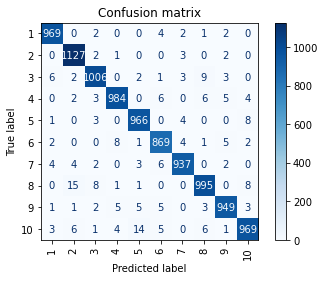

In [11]:
labels = list(range(1,11))
disp = plot_confusion_matrix(svm_fmnist, x_test_reshaped, y_test,
                             display_labels=labels,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             xticks_rotation='vertical')
disp.ax_.set_title('Confusion matrix')

print(classification_report(y_test, predictions))

## 2. FMNIST

Using the FMNIST dataset, use the SVM model on the whole dataset to predict classes.

### 2.1. Reading the dataset

In [ ]:
# Imports the dataset and split it into train and test data.

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = normalize(x_train), normalize(x_test)

print(x_train.shape, y_train.shape, sep="\n")

In [4]:
# Reshapes the dataset so it can be used by the model.

x_train_reshaped = x_train.reshape(x_train.shape[0],-1)
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)

In [5]:
x_train_reshaped.shape

(60000, 784)

### 2.2. Declaring and Training the model

In [6]:
# Declares the model with kernel "linear", defaulting all other values

svm_fmnist = svm.SVC(kernel = 'linear')
svm_fmnist.fit(x_train_reshaped, y_train)

SVC(kernel='linear')

### 2.3. Testing the model

In [7]:
predictions = svm_fmnist.predict(x_test_reshaped)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.77      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.94      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



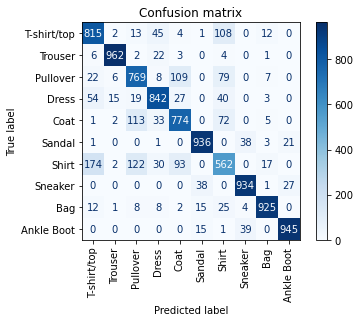

In [14]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker", "Bag", "Ankle Boot"]
disp = plot_confusion_matrix(svm_fmnist, x_test_reshaped, y_test,
                             display_labels=labels,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             xticks_rotation='vertical')
disp.ax_.set_title('Confusion matrix')

print(classification_report(y_test, predictions))

## 3. Using another model (poly, with default OVR)

In [15]:
# Declares the model with kernel "poly" and gamma "scale", defaulting all other values

svm_fmnist = svm.SVC(kernel = 'poly', gamma='scale')
svm_fmnist.fit(x_train_reshaped, y_train)

SVC(kernel='poly')

In [16]:
predictions = svm_fmnist.predict(x_test_reshaped)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.88      0.86      0.87      1000
           4       0.83      0.76      0.79      1000
           5       0.84      0.96      0.89      1000
           6       0.66      0.69      0.68      1000
           7       0.94      0.91      0.92      1000
           8       0.97      0.94      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



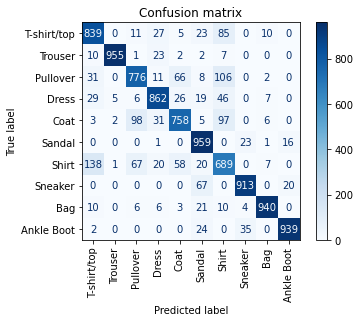

In [17]:
disp = plot_confusion_matrix(svm_fmnist, x_test_reshaped, y_test,
                             display_labels=labels,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             xticks_rotation='vertical')
disp.ax_.set_title('Confusion matrix')

print(classification_report(y_test, predictions))

## 4. Using OVO ("one versus others")

In [18]:
# Declares the model with kernel "poly", gamma "scale" and decision function shape 
# "one versus others", defaulting all other values

svm_fmnist = svm.SVC(kernel = 'poly', gamma='scale', decision_function_shape='ovo')
svm_fmnist.fit(x_train_reshaped, y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [19]:
predictions = svm_fmnist.predict(x_test_reshaped)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.88      0.86      0.87      1000
           4       0.83      0.76      0.79      1000
           5       0.84      0.96      0.89      1000
           6       0.66      0.69      0.68      1000
           7       0.94      0.91      0.92      1000
           8       0.97      0.94      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



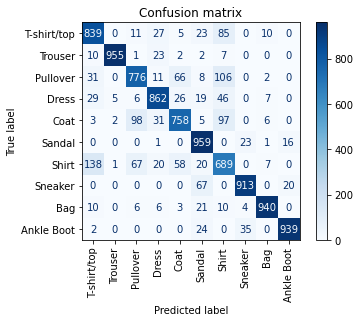

In [20]:
disp = plot_confusion_matrix(svm_fmnist, x_test_reshaped, y_test,
                             display_labels=labels,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             xticks_rotation='vertical')
disp.ax_.set_title('Confusion matrix')

print(classification_report(y_test, predictions))

## 5. Increasing the degree of the kernel

In [21]:
# Declares the model with kernel "poly", degree=5, defaulting all other values

svm_fmnist = svm.SVC(kernel = 'poly', degree=5)
svm_fmnist.fit(x_train_reshaped, y_train)

SVC(degree=5, kernel='poly')

In [22]:
predictions = svm_fmnist.predict(x_test_reshaped)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.70      0.74      1000
           3       0.88      0.81      0.84      1000
           4       0.85      0.73      0.78      1000
           5       0.65      0.96      0.77      1000
           6       0.61      0.64      0.63      1000
           7       0.93      0.84      0.89      1000
           8       0.96      0.92      0.94      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



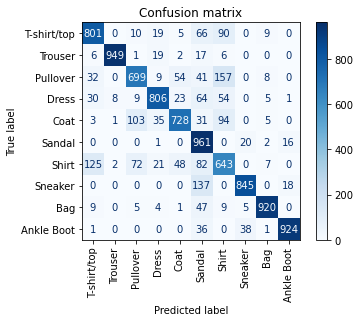

In [23]:
disp = plot_confusion_matrix(svm_fmnist, x_test_reshaped, y_test,
                             display_labels=labels,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             xticks_rotation='vertical')
disp.ax_.set_title('Confusion matrix')

print(classification_report(y_test, predictions))